# Bank Loan Data Analysis



To identify the risk associated with their decision for approval or declining any loan application.

There are majorly two types of risks associated with the decision:
* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.


## Exploratory Data Analysis

In [1]:
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

### 1. Application Data

#### 1.1 Reading Data

In [2]:
# Reading the application data for new applications
appl = pd.read_csv('application_data.csv')

#### 1.2 Analyzing Basic Data Structure

In [3]:
#Take a glance at first 5 rows
appl.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
#Checking the shape of dataframe
appl.shape

(307511, 122)

In [5]:
appl.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [6]:
appl.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

#### 1.3 Data Quality and Identifying Missing Values

In [7]:
#Checking the percentage of null columns
appl.isnull().sum()/appl.shape[0]*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [8]:
# Filtering Columns where Null Value percentage is more than 50%
tempdf = appl.isnull().sum()/(appl.shape[0])*100
tempdf = tempdf[tempdf>=50]
filter_cols = [cols for cols in tempdf.index]
filter_cols

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

In [9]:
# Dropping the Columns with high percentage of NULL Values
appl.drop(filter_cols,axis=1,inplace=True)

##### There are many unwanted columns which would not be required for Analysis. 

##### Removing the unwanted columns

In [10]:
filter_cols = [col for col in appl if col.startswith('FLAG')]

In [11]:
col_list = ['YEARS_BEGINEXPLUATATION_AVG', 
           'FLOORSMAX_AVG',
           'YEARS_BEGINEXPLUATATION_MODE',
           'FLOORSMAX_MODE',
           'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
            'EMERGENCYSTATE_MODE','DAYS_LAST_PHONE_CHANGE',
            'HOUR_APPR_PROCESS_START',
            'REG_REGION_NOT_LIVE_REGION',
            'REG_REGION_NOT_WORK_REGION',
            'LIVE_REGION_NOT_WORK_REGION',
            'REG_CITY_NOT_LIVE_CITY',
            'REG_CITY_NOT_WORK_CITY',
            'LIVE_CITY_NOT_WORK_CITY',
            'AMT_REQ_CREDIT_BUREAU_HOUR',
            'AMT_REQ_CREDIT_BUREAU_DAY',
            'AMT_REQ_CREDIT_BUREAU_WEEK',
            'AMT_REQ_CREDIT_BUREAU_MON',
            'AMT_REQ_CREDIT_BUREAU_QRT',
            'AMT_REQ_CREDIT_BUREAU_YEAR']
            
filter_cols.extend(col_list)

In [12]:
appl.drop(filter_cols,axis=1,inplace=True)

#### 1.4 Analyzing the NULL values for remaining columns and identifying the method to impute them

In [13]:
appl.isnull().sum()>0

SK_ID_CURR                     False
TARGET                         False
NAME_CONTRACT_TYPE             False
CODE_GENDER                    False
CNT_CHILDREN                   False
AMT_INCOME_TOTAL               False
AMT_CREDIT                     False
AMT_ANNUITY                     True
AMT_GOODS_PRICE                 True
NAME_TYPE_SUITE                 True
NAME_INCOME_TYPE               False
NAME_EDUCATION_TYPE            False
NAME_FAMILY_STATUS             False
NAME_HOUSING_TYPE              False
REGION_POPULATION_RELATIVE     False
DAYS_BIRTH                     False
DAYS_EMPLOYED                  False
DAYS_REGISTRATION              False
DAYS_ID_PUBLISH                False
OCCUPATION_TYPE                 True
CNT_FAM_MEMBERS                 True
REGION_RATING_CLIENT           False
REGION_RATING_CLIENT_W_CITY    False
WEEKDAY_APPR_PROCESS_START     False
ORGANIZATION_TYPE              False
EXT_SOURCE_2                    True
EXT_SOURCE_3                    True
O

Below Columns have the NULL Values:
* AMT_ANNUITY                       12
* AMT_GOODS_PRICE                  278
* NAME_TYPE_SUITE                 1292
* OCCUPATION_TYPE                96391
* CNT_FAM_MEMBERS                    2
* EXT_SOURCE_2                     660
* EXT_SOURCE_3                   60965
* OBS_30_CNT_SOCIAL_CIRCLE        1021
* DEF_30_CNT_SOCIAL_CIRCLE        1021
* OBS_60_CNT_SOCIAL_CIRCLE        1021
* DEF_60_CNT_SOCIAL_CIRCLE        1021
* AMT_REQ_CREDIT_BUREAU_HOUR     41519
* AMT_REQ_CREDIT_BUREAU_DAY      41519
* AMT_REQ_CREDIT_BUREAU_WEEK     41519
* AMT_REQ_CREDIT_BUREAU_MON      41519
* AMT_REQ_CREDIT_BUREAU_QRT      41519
* AMT_REQ_CREDIT_BUREAU_YEAR     41519

##### Analyzing the Columns with NULL Values

In [14]:
appl['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

##### Amt_Annuity column has outliers which is very large and most of the values is below 140000,.If we look at the mean, it is 27108 which lies between the IQR. The Max Value for this is very high than the 75% Quantile. Considering all these observation, we can say that replacing the null values with median instead of mean is the ideal way in this scenario


In [15]:
appl['AMT_GOODS_PRICE'].describe().apply(lambda x: format(x, '.2f'))

count     307233.00
mean      538396.21
std       369446.46
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: object

##### AMT_GOODS_PRICE column has outliers which is very large .If we look at the mean, it is 538396.21 which lies between the IQR. The Max Value for this is very high than the 75% Quantile. Considering all these observation, we can say that replacing the null values with median instead of mean is the ideal way in this scenario

In [16]:
# Column NAME_TYPE_SUITE has 1292 NULL Values. Lets Analyze the column
appl['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [17]:
appl['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

##### NAME_TYPE_SUITE is a categorical column with 7 distinct values. Here, Since "Unaccompanied" has the highest number of counts, The ideal way to impute the missing values here would be to fill the NULL values with "Unaccompanied" 

In [18]:
appl['OCCUPATION_TYPE'].describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [19]:
appl['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

##### OCCUPATION_TYPE is a categorical column with 7 distinct values. Here, Since "Laborers" has the highest number of counts, it is safe to say that we can impute the missing values here with "Laborers"

In [20]:
appl['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [21]:
appl['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [22]:
appl['CNT_FAM_MEMBERS'].nunique()

17

##### Here, we notice that the column CNT_FAM_MEMBERS is mapped as integer although it is a categorical value with 17 distinct values. Hence, We should change the dtype for this column. For imputing the missing values, as the count of missing values is too small( only 2), we can fill the missing values with the most occurance which is 2 in this case.

#### 1.5 Checking Datatypes 

In [23]:
appl.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
WEEKDAY_APPR_PROCESS_START      object
ORGANIZATION_TYPE               object
EXT_SOURCE_2             

In [24]:
appl.nunique().sort_values()

TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
NAME_EDUCATION_TYPE                 5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_SOCIAL_CIRCLE           10
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
OBS_60_CNT_SOCIAL_CIRCLE           33
OBS_30_CNT_SOCIAL_CIRCLE           33
ORGANIZATION_TYPE                  58
REGION_POPULATION_RELATIVE         81
EXT_SOURCE_3                      814
AMT_GOODS_PRICE                  1002
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
DAYS_ID_PUBLISH                  6168
DAYS_EMPLOYED                   12574
AMT_ANNUITY 

In [25]:
appl['DAYS_REGISTRATION'] = appl['DAYS_REGISTRATION'].astype('int64')
appl['CNT_FAM_MEMBERS'] = appl['CNT_FAM_MEMBERS'].astype(pd.Int64Dtype())

In [26]:
# Taking the absolute days for day columns instead of negative values
col_list = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for col in col_list:
    appl[col] = appl[col].abs()

##### Checking for Outliers for numeric columns

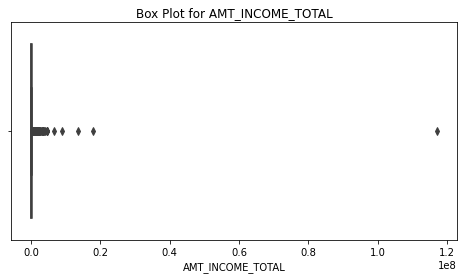

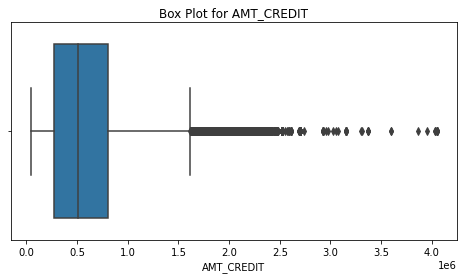

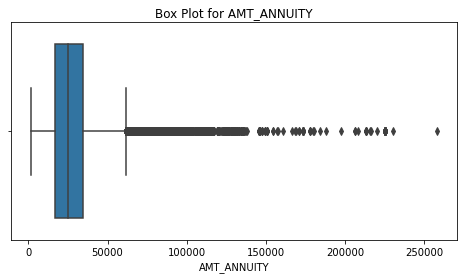

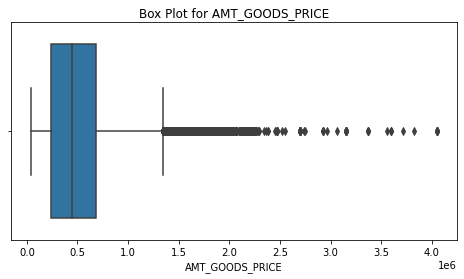

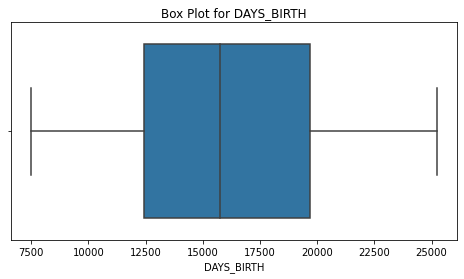

In [27]:
col_list = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH']
for col in col_list:
    plt.figure(figsize=[8,4])
    sns.boxplot(data=appl,x=col)
    plt.title("Box Plot for "+col)
    plt.show()

##### Inference: 
* AMOUNT_TOTAL_INCOME, AMT_CREDIT, AMT_ANNUITY and AMT_GOODS_PRICE columns have outliers
* DAYS_BIRTH Column doesnot have any outlier in the given dataset

##### Binning of Continous variables

In [28]:
# Creating Rnage interval based on quantile values
col_list = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
for col in col_list:
    bins = [np.percentile(appl[col].dropna(),0),np.percentile(appl[col].dropna(),25),np.percentile(appl[col].dropna(),75),np.percentile(appl[col].dropna(),100)]
    labels = ['Low','Medium','High']
    appl[col+'_RANGE']=pd.cut(appl[col], bins= bins, labels= labels)
    
    

In [29]:
# Deriving age from Days birth column
appl['AGE']= appl['DAYS_BIRTH']/365

In [30]:
# Creating range for Age
bins = [0,10,20,30,40,50,60,70,80]
labels = ["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80"]
appl['AGE_RANGE'] = pd.cut(appl['AGE'], bins= bins, labels= labels)

## 2. Data Analysis

### 2.1 Data Imbalance

In [31]:
appl.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

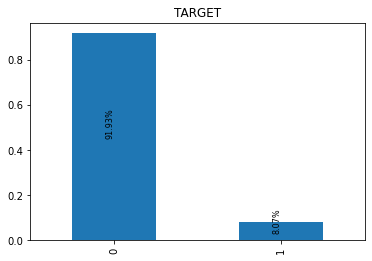

In [32]:
plots=appl.TARGET.value_counts(normalize=True).plot(kind='bar')
for p in plots.patches:

    percentage = '{:.2f}%'.format(100 * p.get_height())
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()/2
    plt.title("TARGET")
    plt.annotate(percentage, (x, y),rotation=90, size = 8)

plt.show()

 ##### Inference
* Based on above analysis, we can say that 8.07%of the clients are having payment difficulties while 91.93% Doesnot have any payment difficulties

### 2.2 Dividing the data in two different dataframes based on target variable

In [33]:
target_1 = appl[appl.TARGET==1]
target_0 = appl[appl.TARGET==0]

In [34]:
target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,AMT_GOODS_PRICE_RANGE,AGE,AGE_RANGE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,Laborers,1,2,2,WEDNESDAY,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,Medium,Medium,Medium,Medium,25.920548,20-30
26,100031,1,Cash loans,F,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,6573,1827,Cooking staff,1,3,2,MONDAY,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,Low,High,Medium,High,51.298630,50-60
40,100047,1,Cash loans,M,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182,1029,Laborers,2,2,2,TUESDAY,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,Medium,High,High,High,47.895890,40-50
42,100049,1,Cash loans,F,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,45,4409,Sales staff,2,3,3,THURSDAY,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,Medium,Medium,Low,Low,36.668493,30-40
81,100096,1,Cash loans,F,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,365243,5391,4199,NaN,2,2,2,THURSDAY,XNA,0.023952,0.720944,1.0,1.0,1.0,1.0,Low,Low,Low,Medium,67.928767,60-70


In [35]:
target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,AMT_GOODS_PRICE_RANGE,AGE,AGE_RANGE
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,Core staff,2,1,1,MONDAY,School,0.622246,NaN,1.0,0.0,1.0,0.0,High,High,High,High,45.931507,40-50
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,Laborers,1,2,2,MONDAY,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,Low,Low,Low,Low,52.180822,50-60
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,2437,Laborers,2,2,2,WEDNESDAY,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,Medium,Medium,Medium,Medium,52.068493,50-60
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,Core staff,1,2,2,THURSDAY,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,Medium,Medium,Medium,Medium,54.608219,50-60
5,100008,0,Cash loans,M,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970,477,Laborers,2,2,2,WEDNESDAY,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,Low,Medium,Medium,Medium,46.413699,40-50


#### Univariate Analysis

#### Continous columns Analysis

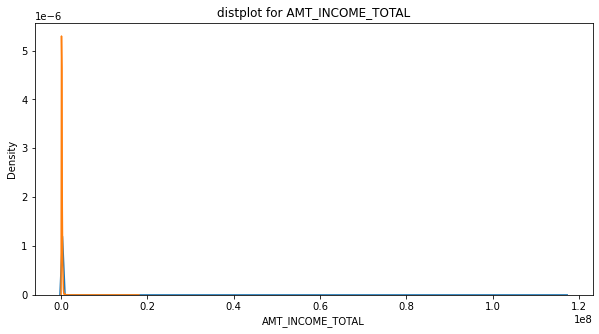

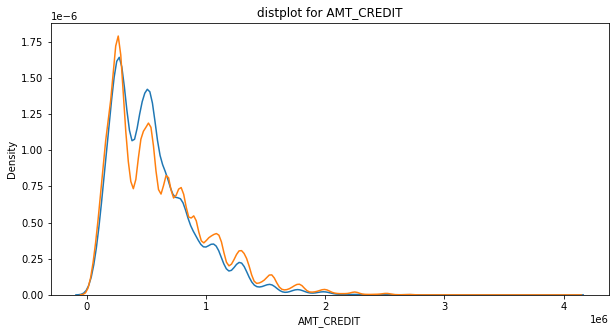

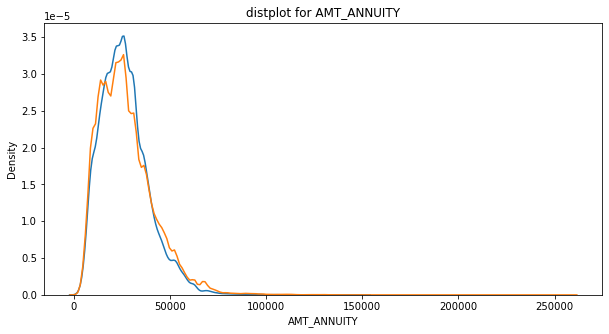

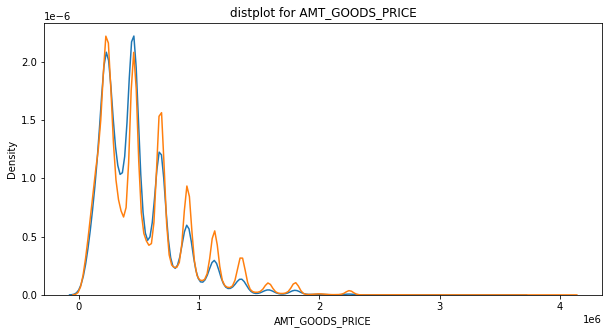

In [36]:
col_list = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
for col in col_list:
    fig,ax = plt.subplots(1,1,figsize=[10,5])
    sns.distplot(target_1[col], hist = False, label = 'target_1')
    sns.distplot(target_0[col], hist = False, label = 'target_0')
    ax.set_title('distplot for '+col)
    fig.show()

##### Inference
* Although there is a slight edge for target 0 over target 1, we cannot conclusively say that payment difficulties or on-time payment is correlated with AMT_CREDIT
*  There is an edge for target 0 over target 1 for AMT_GOODS_PRICE
*  There is a slight edge for target 0 over target 1, we cannot conclusively say that payment difficulties or on-time payment is correlated with AMT_ANNUITY

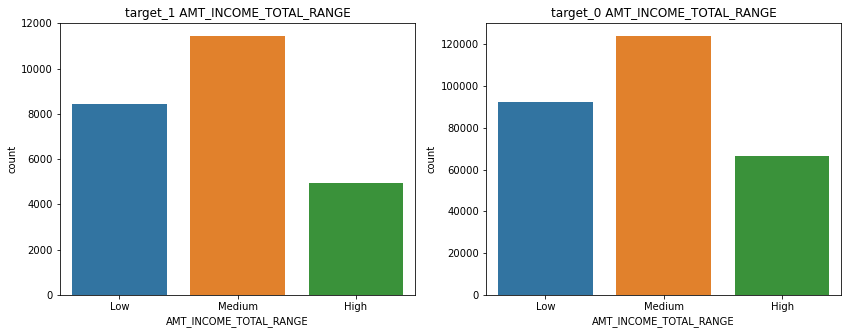

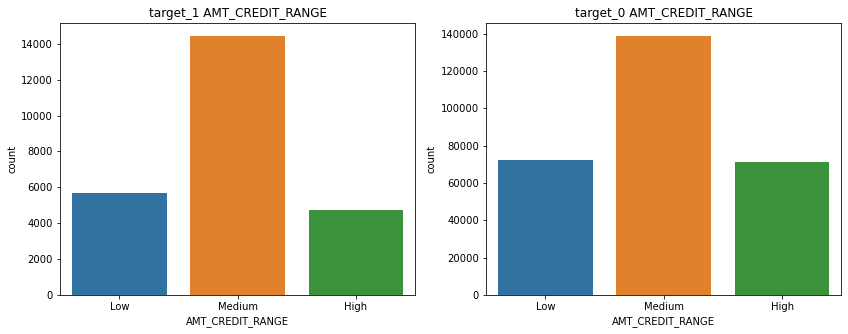

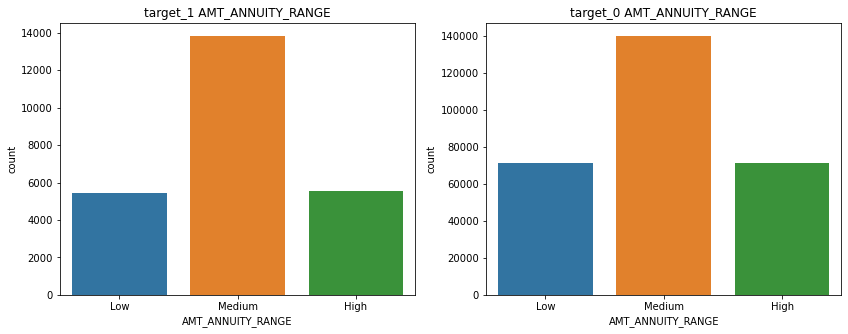

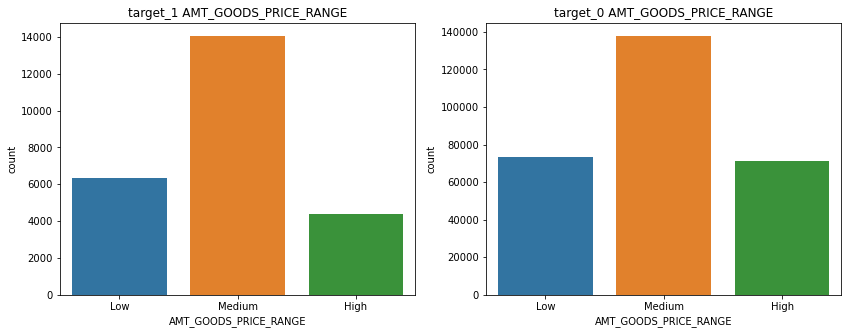

In [37]:
col_list = ['AMT_INCOME_TOTAL_RANGE', 'AMT_CREDIT_RANGE', 'AMT_ANNUITY_RANGE','AMT_GOODS_PRICE_RANGE']#, 'AGE', 'AGE_RANGE']
for col in col_list:
    fig,ax = plt.subplots(1,2,figsize=[14,5])
    sns.countplot(target_1[col], ax=ax[0])
    sns.countplot(target_0[col], ax=ax[1])
    ax[0].set_title('target_1 '+col)
    ax[1].set_title('target_0 '+col)
    fig.show()

##### Inference
* High Income Range tend to make on-time payments more frequent
* If amount Goods Price is high, the frequency of target 0 is higher than that of target 1

#### Univariate Analysis for Categorical columns

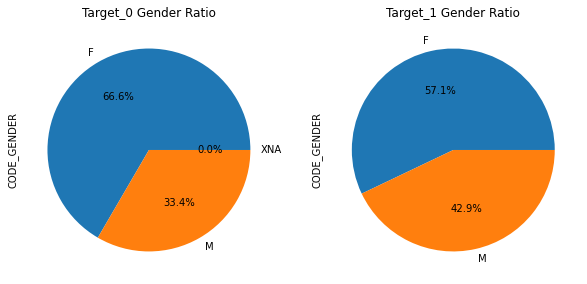

In [38]:
# Analysis for Code Gender
fig,ax= plt.subplots(1,2,figsize=[10,6])
target_0.CODE_GENDER.value_counts(normalize=True).plot(kind='pie',autopct="%.1f%%",ax=ax[0])
target_1.CODE_GENDER.value_counts(normalize=True).plot(kind='pie',autopct="%.1f%%",ax=ax[1])
ax[0].set_title("Target_0 Gender Ratio")
ax[1].set_title("Target_1 Gender Ratio")
plt.show()

##### Inference
* From the pie-plot, we can observe that female has a better score of paying the loans on-time when compared to Men While 66.6% Female are able to pay on time, the men's ratio is 33.4% for the same

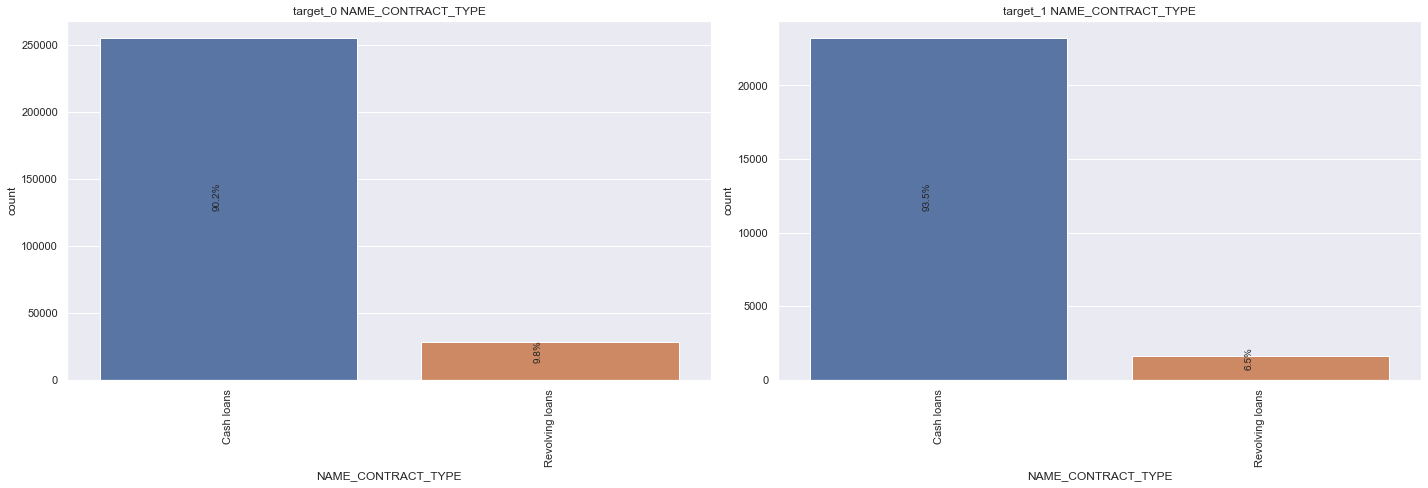

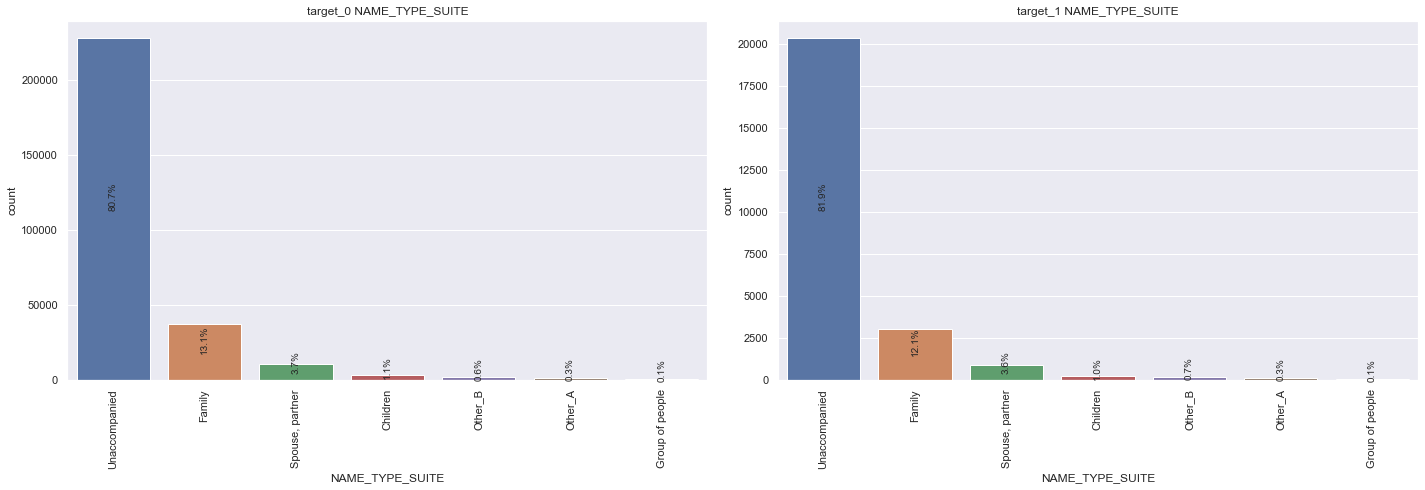

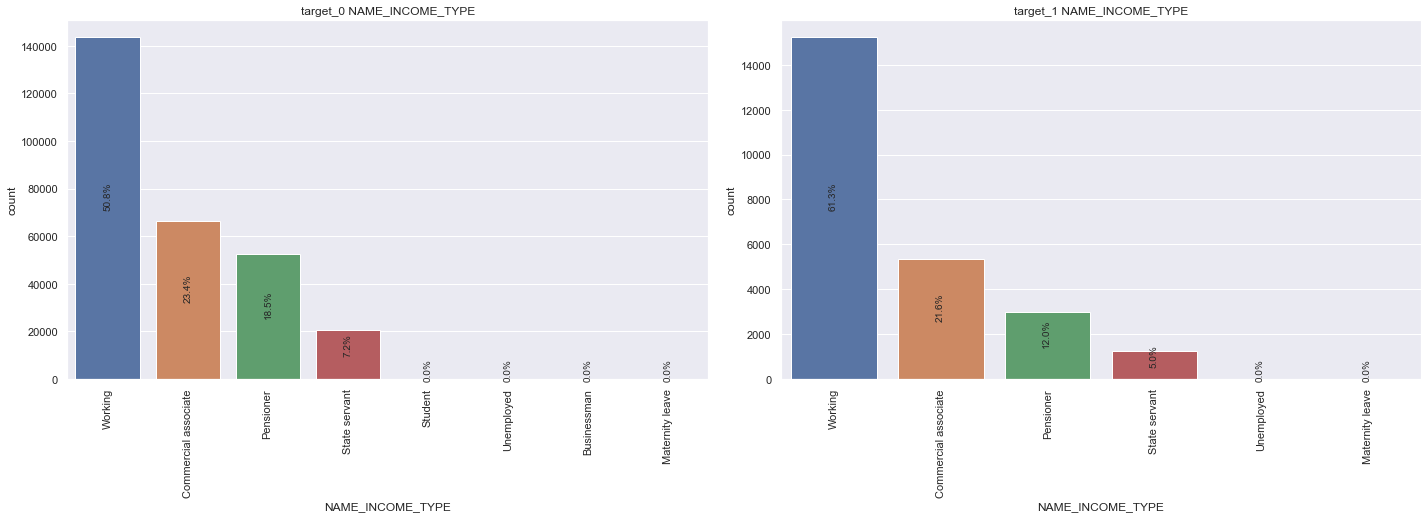

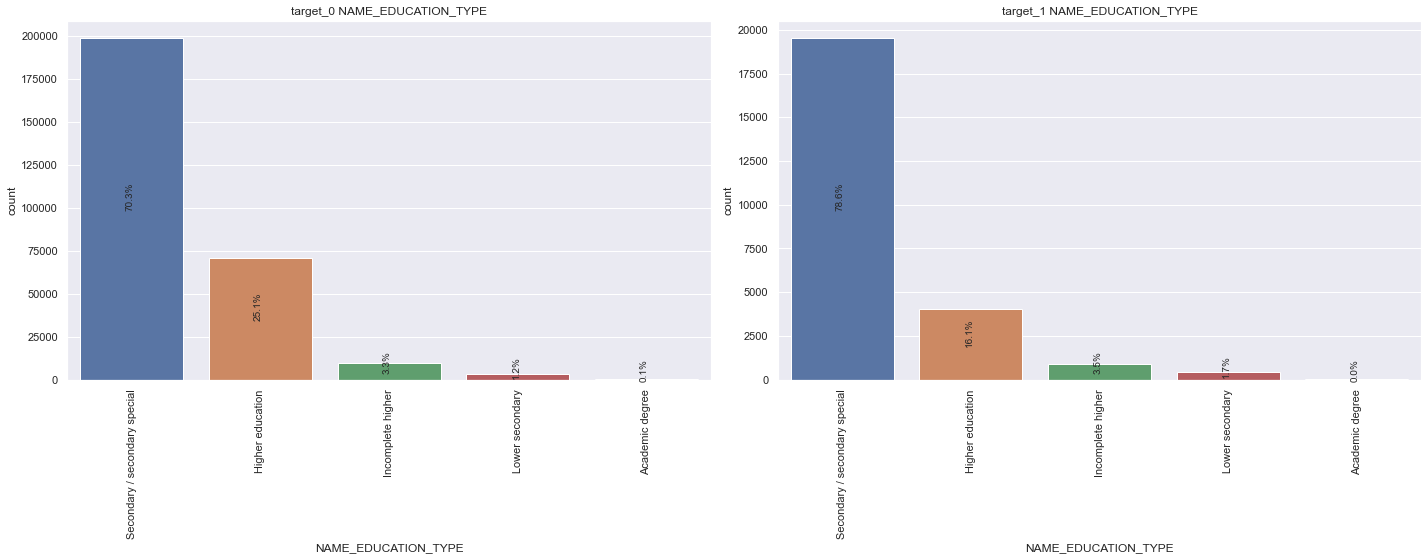

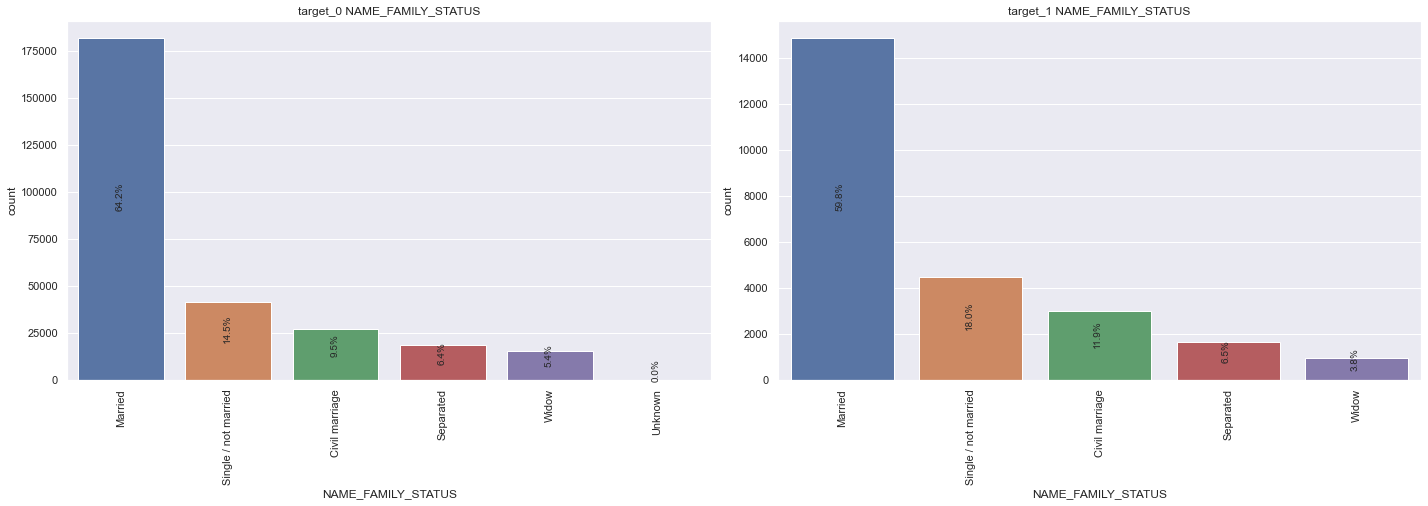

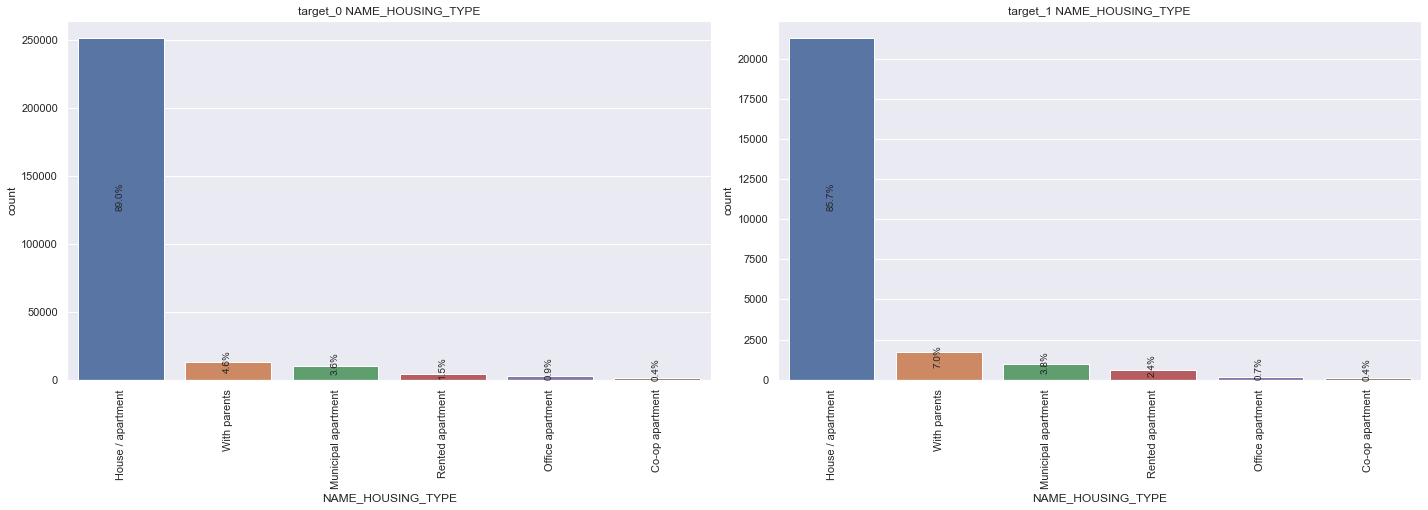

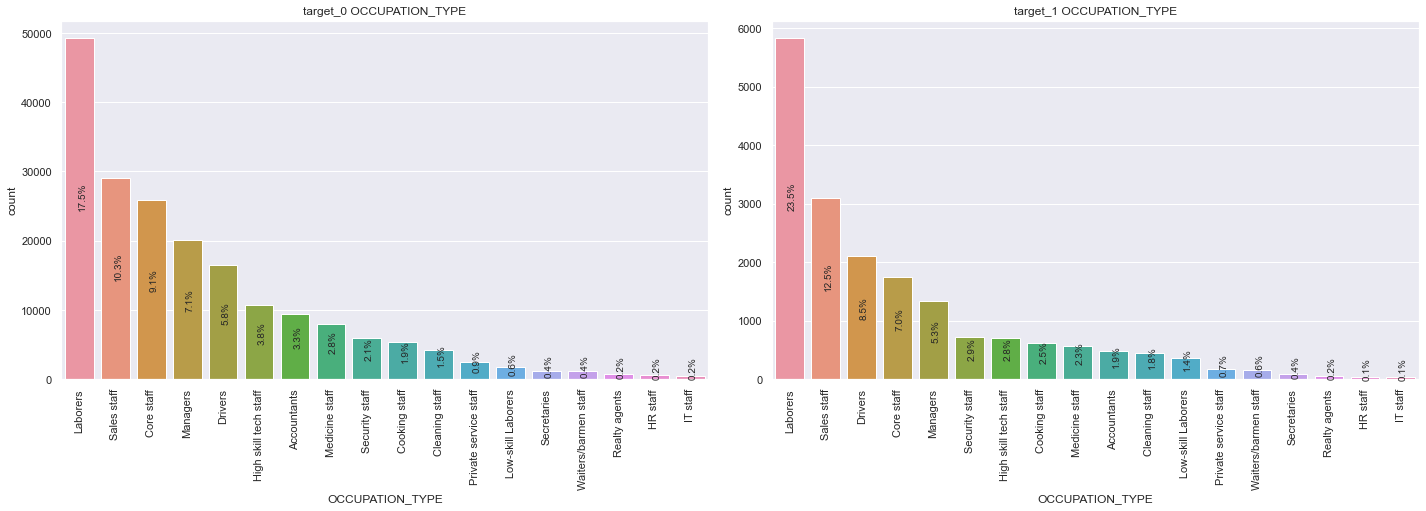

In [39]:
cat_cols = ['NAME_CONTRACT_TYPE','NAME_TYPE_SUITE', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','OCCUPATION_TYPE']
for col in cat_cols:
    sns.set(style="darkgrid")
    fig,ax = plt.subplots(1,2,figsize=[20,6])
    sns.countplot(target_0[col],order=target_0[col].value_counts().index,ax=ax[0])
    sns.countplot(target_1[col],order=target_1[col].value_counts().index,ax=ax[1])
    ax[0].set_title('target_0 '+col)
    ax[1].set_title('target_1 '+col)
    fig.tight_layout()
    #print(fig.axes)
    plt.xticks(rotation=90)
    for a in fig.axes:
        plt.sca(a)
        plt.xticks(rotation=90)
   
    total = len(target_0[col])
    for p in ax[0].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 - 0.05
        y = p.get_y() + p.get_height()/2
        ax[0].annotate(percentage, (x, y),rotation=90, size = 10)
        
    total = len(target_1[col])
    for p in ax[1].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 - 0.05
        y = p.get_y() + p.get_height()/2
        ax[1].annotate(percentage, (x, y),rotation=90, size = 10)
    fig.show()

##### Inference
* Occupation type - Core Staff and Managers payment frequency is more compared to missed payments
* Drivers tend to have more default payments

#### Identifying Correlation

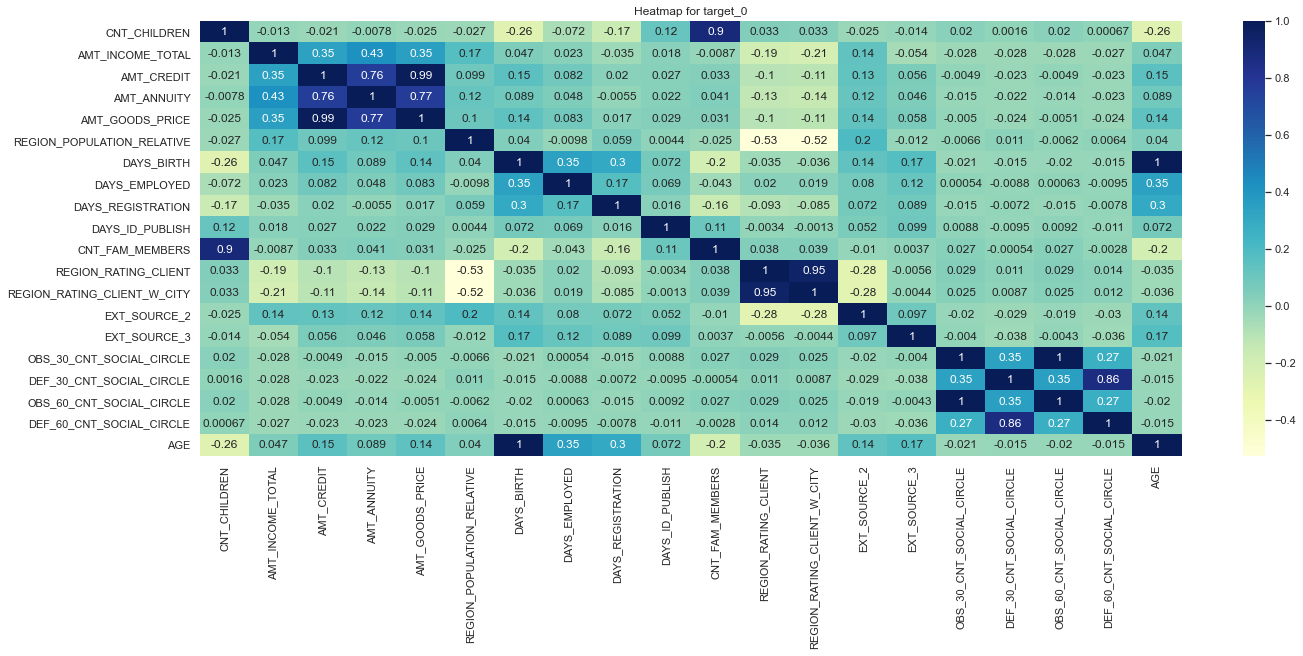

In [40]:
fix,ax = plt.subplots(1,1,figsize=[22,8])
sns.heatmap(target_0.drop(['TARGET','SK_ID_CURR'],axis=1).dropna().corr(),annot=True,cmap='YlGnBu')
plt.title("Heatmap for target_0")
plt.show()

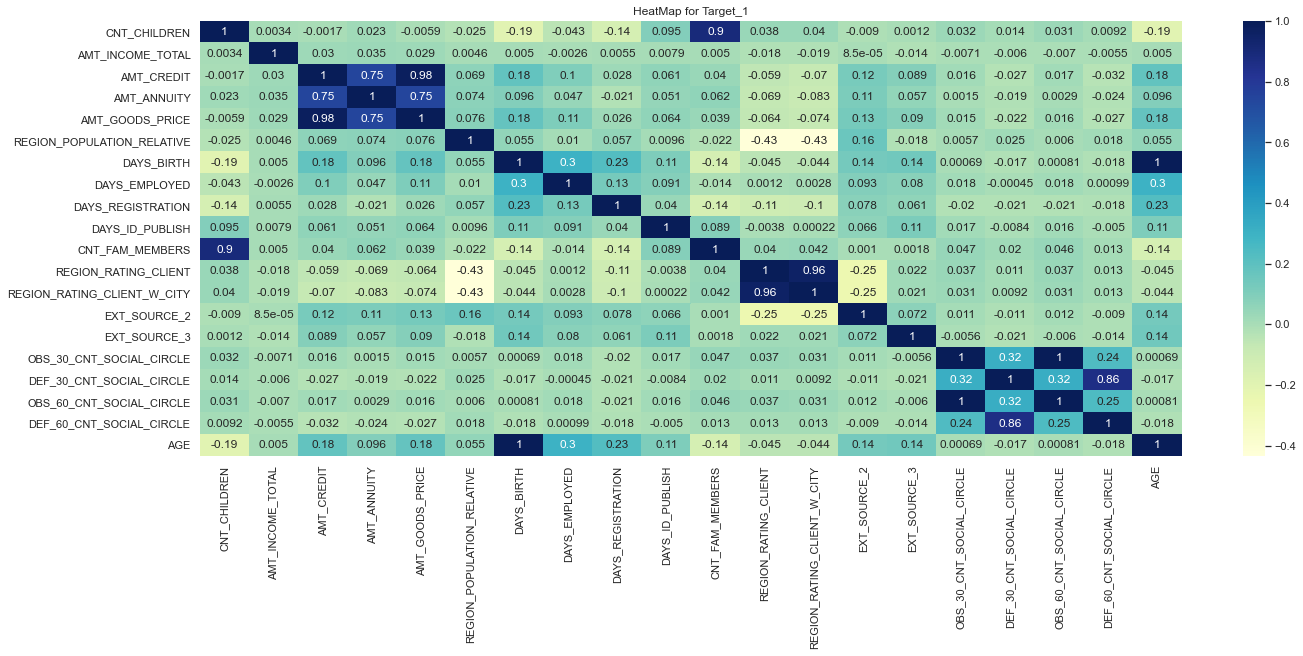

In [41]:
fix,ax = plt.subplots(1,1,figsize=[22,8])
sns.heatmap(target_1.drop(['TARGET','SK_ID_CURR'],axis=1).dropna().corr(),annot=True,cmap='YlGnBu')
plt.title("HeatMap for Target_1")
plt.show()

In [42]:

corr_0 = appl[appl["TARGET"]==0].drop("AGE",axis=1).dropna().corr()
corr_df0 = corr_0.where(np.triu(np.ones(corr_0.shape), k=1).astype(np.bool))
corr_df0 = corr_df0.unstack().reset_index()
corr_df0.columns = ['VAR1', 'VAR2', 'Correlation']
corr_df0.dropna(subset = ['Correlation'], inplace = True)
corr_df0['Abs_Correlation'] = corr_df0['Correlation'].abs()
corr_df0.sort_values(by = 'Abs_Correlation', ascending = False).head(10)


,VAR1,VAR2,Correlation,Abs_Correlation
416,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998562,0.998562
130,AMT_GOODS_PRICE,AMT_CREDIT,0.986643,0.986643
307,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.949577,0.949577
254,CNT_FAM_MEMBERS,CNT_CHILDREN,0.896352,0.896352
438,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.864013,0.864013
131,AMT_GOODS_PRICE,AMT_ANNUITY,0.767564,0.767564
109,AMT_ANNUITY,AMT_CREDIT,0.763467,0.763467
280,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,-0.527448,0.527448
301,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,-0.523624,0.523624
108,AMT_ANNUITY,AMT_INCOME_TOTAL,0.425839,0.425839


In [43]:

corr_1 = appl[appl["TARGET"]==1].drop("AGE",axis=1).dropna().corr()
#corr_0 = target_0.corr()
corr_df1 = corr_1.where(np.triu(np.ones(corr_1.shape), k=1).astype(np.bool))
corr_df1 = corr_df1.unstack().reset_index()
corr_df1.columns = ['VAR1', 'VAR2', 'Correlation']
corr_df1.dropna(subset = ['Correlation'], inplace = True)
corr_df1['Abs_Correlation'] = corr_df1['Correlation'].abs()
corr_df1.sort_values(by = 'Abs_Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation,Abs_Correlation
416,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998323,0.998323
130,AMT_GOODS_PRICE,AMT_CREDIT,0.982386,0.982386
307,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.959086,0.959086
254,CNT_FAM_MEMBERS,CNT_CHILDREN,0.898724,0.898724
438,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.863681,0.863681
131,AMT_GOODS_PRICE,AMT_ANNUITY,0.747741,0.747741
109,AMT_ANNUITY,AMT_CREDIT,0.746216,0.746216
301,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,-0.434247,0.434247
280,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,-0.429567,0.429567
417,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.323051,0.323051


##### Inference
* There is a high correlation between OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE in both target 0 and target 1 data files
* AMT GOODS Price and AMT_CREDIT highly correlated in both the data files
* 9 out of Top 10 correlated variable are same in both target 0 and target 1

#### Bivariate Analysis

#### Categorical vs Continous variable

##### AMT_CREDIT VS OCCUPATION TYPE

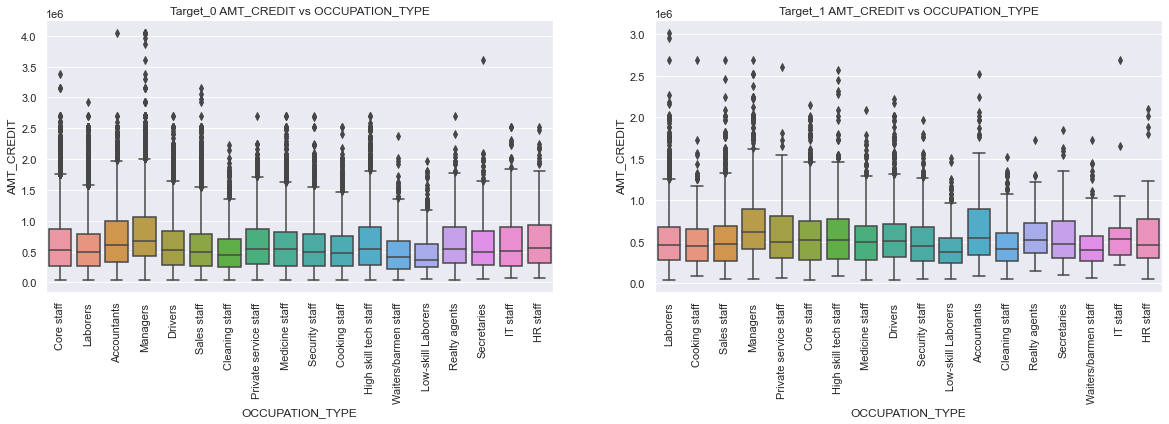

In [44]:
fig,ax = plt.subplots(1,2,figsize=[20,5])
ax[0].set_title("Target_0 AMT_CREDIT vs OCCUPATION_TYPE")
sns.boxplot(x = 'OCCUPATION_TYPE', y = 'AMT_CREDIT', data = target_0,ax=ax[0])
ax[1].set_title("Target_1 AMT_CREDIT vs OCCUPATION_TYPE")
sns.boxplot(x  = 'OCCUPATION_TYPE', y = 'AMT_CREDIT', data = target_1,ax=ax[1])
for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
plt.show()

##### Inference
* Labourers with High Credit above 2000000 are more likely to have payment difficulties.


#### AMT_CREDIT vs NAME_EDUCATION_TYPE

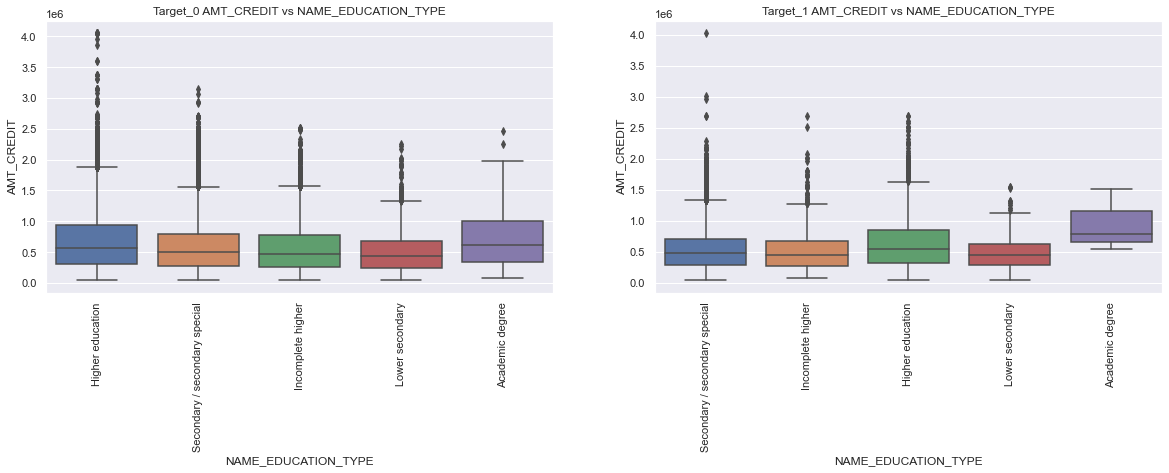

In [45]:
fig,ax = plt.subplots(1,2,figsize=[20,5])
ax[0].set_title("Target_0 AMT_CREDIT vs NAME_EDUCATION_TYPE")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = target_0, ax=ax[0])
ax[1].set_title("Target_1 AMT_CREDIT vs NAME_EDUCATION_TYPE")
sns.boxplot(x  = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = target_1, ax=ax[1])
for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
plt.show()

##### Inference
* The median for Loan Defaulters for Academic degree with higher credit is more and hence, we should recommend on approving lesser loan amount for Academic degree holders

#### AMT_CREDIT vs NAME_INCOME_TYPE

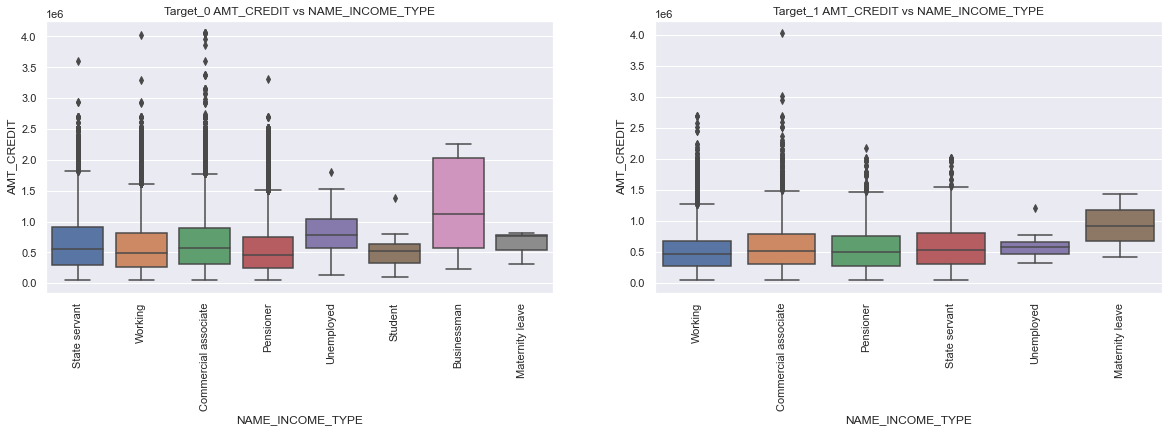

In [46]:
fig,ax = plt.subplots(1,2,figsize=[20,5])
ax[0].set_title("Target_0 AMT_CREDIT vs NAME_INCOME_TYPE")
sns.boxplot(x = 'NAME_INCOME_TYPE', y = 'AMT_CREDIT', data = target_0,ax=ax[0])
ax[1].set_title("Target_1 AMT_CREDIT vs NAME_INCOME_TYPE")
sns.boxplot(x  = 'NAME_INCOME_TYPE', y = 'AMT_CREDIT', data = target_1,ax=ax[1])
for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
plt.show()

##### Inference
* Student and Businessman are not in the late payment difficulties and hence these class should be focussed on for more loans
* Average Loan amount of Businessman is higher than all other income type

#### Continous vs Continous Variable

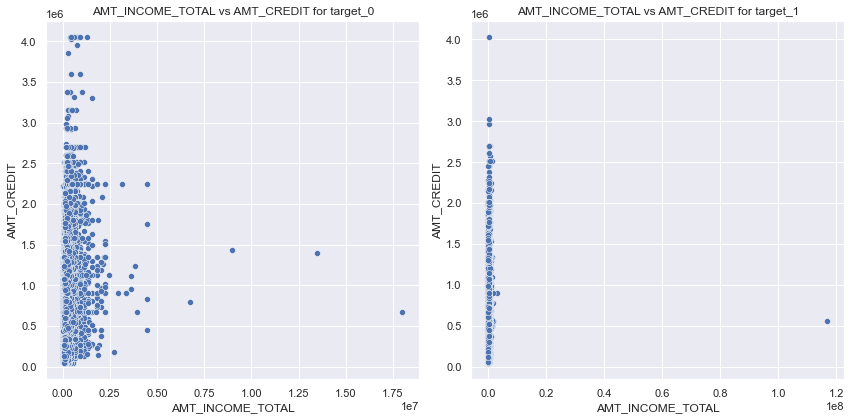

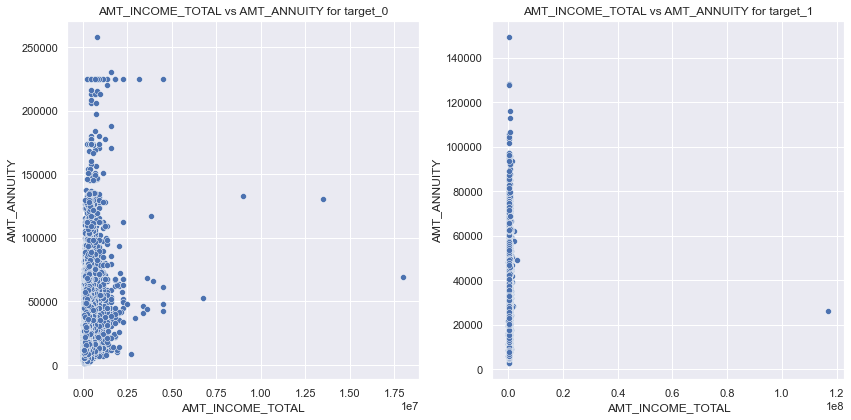

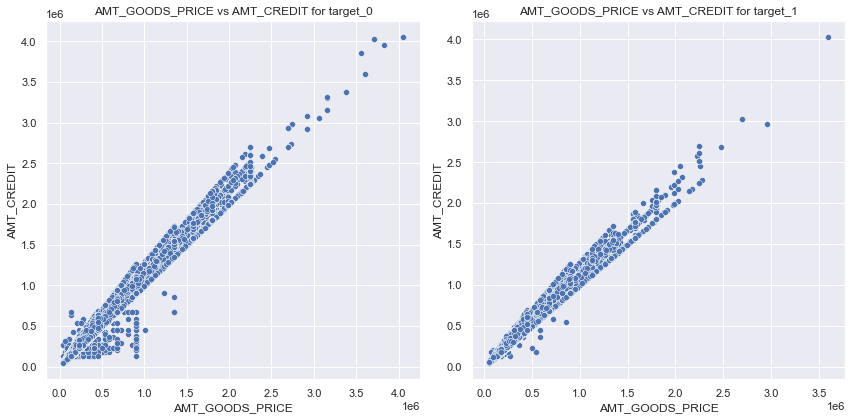

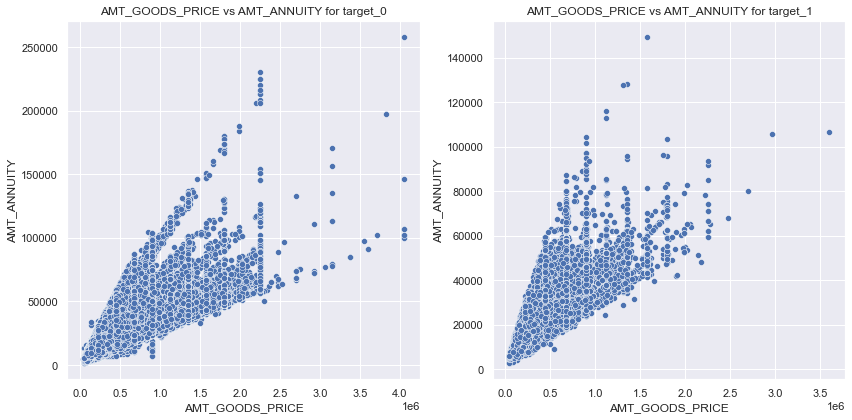

In [47]:
col_list_1 = ['AMT_INCOME_TOTAL','AMT_GOODS_PRICE']
col_list_2 = ['AMT_CREDIT','AMT_ANNUITY']
for col_1 in col_list_1:
    for col_2 in col_list_2:
        fig,ax = plt.subplots(1,2,figsize=[12,6])
        sns.scatterplot(x=col_1,y=col_2,data=target_0,ax=ax[0])
        sns.scatterplot(x=col_1,y=col_2,data=target_1,ax=ax[1])
        ax[0].set_title(col_1 +" vs "+ col_2 + " for target_0")
        ax[1].set_title(col_1 +" vs "+ col_2 + " for target_1")
        fig.tight_layout()
        plt.show()

##### Inference
* AMT_GOOD_PRICE in below 1000000 and AMT_CREDIT below 500000 is more likely to be paid on time
* There is a high correlation between AMT_GOOD_PRICE and AMT_CREDIT

#### Categorical vs Categorical

##### OCCUPATION_TYPE vs NAME_CONTRACT_TYPE

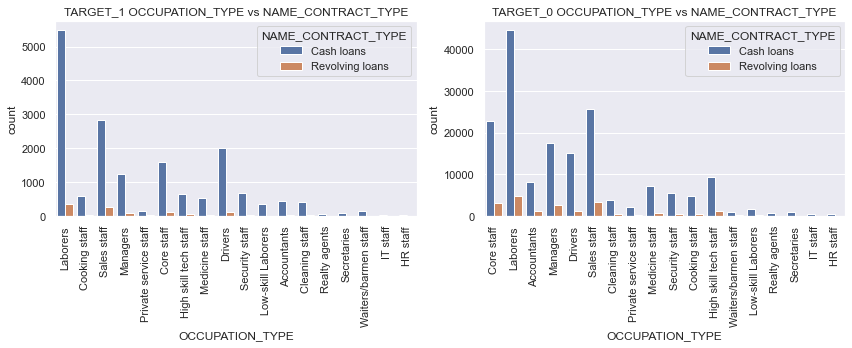

In [48]:
fig,ax=plt.subplots(1,2,figsize=[12,5])
sns.countplot('OCCUPATION_TYPE', hue = 'NAME_CONTRACT_TYPE', data =target_1,ax=ax[0])
ax[0].set_title("TARGET_1 OCCUPATION_TYPE vs NAME_CONTRACT_TYPE")
sns.countplot('OCCUPATION_TYPE', hue = 'NAME_CONTRACT_TYPE', data =target_0,ax=ax[1])
ax[1].set_title("TARGET_0 OCCUPATION_TYPE vs NAME_CONTRACT_TYPE")
for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
        fig.tight_layout()
plt.show()

##### Inference
* Revolving Loans for Accountants are very low and more likely to be paid on time.


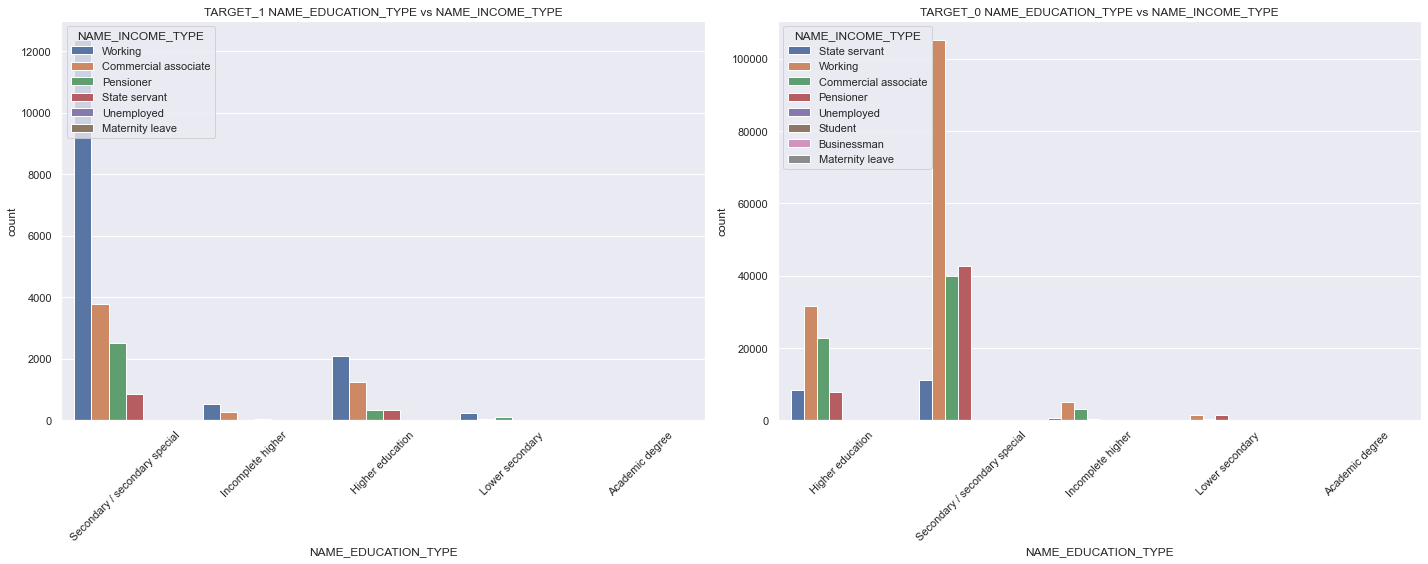

In [49]:
fig,ax=plt.subplots(1,2,figsize=[20,8])
sns.countplot('NAME_EDUCATION_TYPE', hue = 'NAME_INCOME_TYPE', data =target_1,ax=ax[0])
ax[0].set_title("TARGET_1 NAME_EDUCATION_TYPE vs NAME_INCOME_TYPE")
sns.countplot('NAME_EDUCATION_TYPE', hue = 'NAME_INCOME_TYPE', data =target_0,ax=ax[1])
ax[1].set_title("TARGET_0 NAME_EDUCATION_TYPE vs NAME_INCOME_TYPE")
for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=45)
        fig.tight_layout()
plt.show()

##### Inference
* Student in Lower secondary Education takes less loans but they make the payments on-time
* State servant with Higher education type are likely to pay more loans on-time than with Secondary education type

##### Conclusion

* Businessman seems to take higher loan amount and make regular payment, however the number of loans taken by businessman are less and hence Bank should focus on providing more loans to Businessman.
* Student seems to make successful On-Time payments and hence the focus should be on giving more loans to Students
* State servant with Higher education type are likely to pay more loans on-time than with Secondary education type
* Loan Defaulters for Academic degree with higher credit is more and hence, we should recommend on approving lesser loan amount for Academic degree holders